In [59]:
import mne
import numpy as np 
import pandas as pd 
import os
from tqdm import tqdm
import glob
from matplotlib import pyplot as plt


In [60]:
_dfs_list = []
for csv_filename in tqdm(glob.glob('./KAIST/CVS_M1.csv')):
    _dfs_list.append(pd.read_csv(csv_filename,header=None))
df = pd.concat(_dfs_list)
del(_dfs_list)
#df = df.drop(['Unnamed: 0'], axis=1)
df.columns = ['sample_'+str(col) for col in df.columns]
sensor= ['Fp1-Fp3']*28+['Fp1']*23
df['sensor_postion']=sensor
subjects=[]
for i in range(0,51):
    a="subject_"+str(i)
    subjects.append(a)
#print(sensor,len(sensor))
df['subject_id']=subjects
df

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.20s/it]


,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,...,sample_74992,sample_74993,sample_74994,sample_74995,sample_74996,sample_74997,sample_74998,sample_74999,sensor_postion,subject_id
0,7.210000,10.890000,14.550000,14.650000,11.800000,9.710000,9.290000,10.280000,10.700000,8.550000,...,1.540000,1.560000,-0.270000,-1.660000,-3.280000,-3.300000,0.980000,5.530000,Fp1-Fp3,subject_0
1,-46.490000,-49.470000,-52.090000,-51.410000,-50.080000,-54.000000,-60.940000,-63.550000,-62.540000,-59.860000,...,-44.450000,-47.860000,-46.360000,-44.490000,-42.490000,-39.550000,-36.340000,-34.110000,Fp1-Fp3,subject_1
2,8.180000,6.930000,5.200000,5.350000,6.170000,5.610000,3.230000,-0.160000,-2.340000,-2.060000,...,11.650000,12.590000,13.880000,13.640000,11.850000,9.840000,7.800000,5.920000,Fp1-Fp3,subject_2
3,-5.880000,-9.930000,-11.620000,-10.360000,-8.200000,-7.340000,-9.720000,-14.100000,-15.390000,-13.420000,...,-8.240000,-9.520000,-13.530000,-8.830000,2.680000,10.800000,11.980000,6.180000,Fp1-Fp3,subject_3
4,75.270000,81.670000,88.540000,96.850000,104.890000,111.450000,115.820000,118.310000,119.500000,119.710000,...,24.520000,25.240000,27.100000,28.070000,27.150000,25.460000,23.530000,21.190000,Fp1-Fp3,subject_4
5,170.120000,171.410000,168.390000,164.630000,166.860000,172.030000,172.610000,171.420000,173.430000,176.320000,...,903.060000,921.710000,896.230000,850.060000,833.760000,839.200000,826.510000,799.010000,Fp1-Fp3,subject_5
6,86.810000,76.440000,66.300000,60.330000,56.650000,51.490000,45.330000,42.500000,44.140000,46.280000,...,-8.570000,-10.010000,-10.080000,-7.630000,-8.930000,-14.750000,-19.430000,-22.840000,Fp1-Fp3,subject_6
7,-27.510000,-23.340000,-17.400000,-11.000000,-8.320000,-12.070000,-15.870000,-16.790000,-13.800000,-1.490000,...,-32.500000,-46.060000,-52.640000,-49.630000,-36.750000,-26.990000,-28.230000,-22.990000,Fp1-Fp3,subject_7
8,7.370000,3.560000,-0.290000,-0.990000,1.100000,2.120000,0.880000,0.370000,0.180000,-1.320000,...,-35.790000,-39.100000,-39.070000,-36.760000,-34.740000,-32.880000,-31.240000,-31.900000,Fp1-Fp3,subject_8
9,-56.740000,-51.250000,-46.830000,-51.940000,-56.320000,-52.010000,-49.200000,-50.730000,-49.910000,-44.880000,...,-12.500000,-28.290000,-29.040000,-19.240000,-16.000000,-19.620000,-31.290000,-41.860000,Fp1-Fp3,subject_9


In [61]:
df1=df.head(28)
df1

,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,...,sample_74992,sample_74993,sample_74994,sample_74995,sample_74996,sample_74997,sample_74998,sample_74999,sensor_postion,subject_id
0,7.21,10.89,14.55,14.65,11.80,9.71,9.29,10.28,10.70,8.55,...,1.54,1.56,-0.27,-1.66,-3.28,-3.30,0.98,5.53,Fp1-Fp3,subject_0
1,-46.49,-49.47,-52.09,-51.41,-50.08,-54.00,-60.94,-63.55,-62.54,-59.86,...,-44.45,-47.86,-46.36,-44.49,-42.49,-39.55,-36.34,-34.11,Fp1-Fp3,subject_1
2,8.18,6.93,5.20,5.35,6.17,5.61,3.23,-0.16,-2.34,-2.06,...,11.65,12.59,13.88,13.64,11.85,9.84,7.80,5.92,Fp1-Fp3,subject_2
3,-5.88,-9.93,-11.62,-10.36,-8.20,-7.34,-9.72,-14.10,-15.39,-13.42,...,-8.24,-9.52,-13.53,-8.83,2.68,10.80,11.98,6.18,Fp1-Fp3,subject_3
4,75.27,81.67,88.54,96.85,104.89,111.45,115.82,118.31,119.50,119.71,...,24.52,25.24,27.10,28.07,27.15,25.46,23.53,21.19,Fp1-Fp3,subject_4
5,170.12,171.41,168.39,164.63,166.86,172.03,172.61,171.42,173.43,176.32,...,903.06,921.71,896.23,850.06,833.76,839.20,826.51,799.01,Fp1-Fp3,subject_5
6,86.81,76.44,66.30,60.33,56.65,51.49,45.33,42.50,44.14,46.28,...,-8.57,-10.01,-10.08,-7.63,-8.93,-14.75,-19.43,-22.84,Fp1-Fp3,subject_6
7,-27.51,-23.34,-17.40,-11.00,-8.32,-12.07,-15.87,-16.79,-13.80,-1.49,...,-32.50,-46.06,-52.64,-49.63,-36.75,-26.99,-28.23,-22.99,Fp1-Fp3,subject_7
8,7.37,3.56,-0.29,-0.99,1.10,2.12,0.88,0.37,0.18,-1.32,...,-35.79,-39.10,-39.07,-36.76,-34.74,-32.88,-31.24,-31.90,Fp1-Fp3,subject_8
9,-56.74,-51.25,-46.83,-51.94,-56.32,-52.01,-49.20,-50.73,-49.91,-44.88,...,-12.50,-28.29,-29.04,-19.24,-16.00,-19.62,-31.29,-41.86,Fp1-Fp3,subject_9


In [62]:
df2=df.tail(23)
df2

,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9,...,sample_74992,sample_74993,sample_74994,sample_74995,sample_74996,sample_74997,sample_74998,sample_74999,sensor_postion,subject_id
28,-0.820000,-1.020000,2.580000,8.490000,16.340000,22.660000,17.310000,0.640000,-19.100000,-35.590000,...,-3.900000,-2.620000,-0.800000,0.560000,0.970000,1.250000,1.760000,1.900000,Fp1,subject_28
29,-0.170000,-1.380000,-5.030000,-9.030000,-9.550000,-7.440000,-4.420000,-1.910000,-2.660000,-5.230000,...,49.070000,51.930000,51.520000,45.570000,36.830000,29.300000,24.040000,20.660000,Fp1,subject_29
30,-3.880000,-5.110000,8.810000,26.210000,36.040000,39.680000,31.540000,18.890000,21.500000,34.950000,...,4.280000,4.260000,4.020000,4.060000,4.730000,5.960000,7.180000,8.180000,Fp1,subject_30
31,-21.050000,-34.290000,-54.020000,-75.990000,-87.730000,-93.730000,-97.200000,-92.530000,-83.560000,-81.780000,...,24.810000,25.490000,25.380000,25.470000,25.830000,26.640000,28.370000,30.780000,Fp1,subject_31
32,3.910000,9.150000,11.260000,16.750000,21.700000,23.000000,27.870000,32.490000,31.900000,29.210000,...,22.270000,36.070000,52.430000,67.670000,79.980000,89.960000,98.910000,107.410000,Fp1,subject_32
33,3.920000,-1.970000,-8.330000,-9.190000,-7.000000,0.270000,8.350000,5.680000,-4.710000,-7.900000,...,8.220000,10.320000,11.550000,11.440000,11.380000,12.020000,13.580000,15.570000,Fp1,subject_33
34,17.180000,26.800000,27.510000,21.200000,10.390000,3.870000,9.050000,17.560000,17.330000,11.940000,...,0.090000,1.070000,2.640000,4.570000,7.050000,9.290000,10.070000,9.230000,Fp1,subject_34
35,5.040000,9.170000,14.300000,18.910000,20.230000,19.540000,19.320000,19.800000,20.660000,22.620000,...,-25.040000,-24.610000,-26.080000,-29.570000,-33.790000,-36.490000,-36.370000,-34.030000,Fp1,subject_35
36,0.793521,4.159219,7.489568,15.154911,23.879443,27.382995,27.122853,24.178362,18.694505,15.534063,...,-3.032691,-3.749239,-4.565954,-3.823039,-1.354473,1.610694,3.785934,4.734353,Fp1,subject_36
37,-25.240000,-50.480000,-78.120000,-97.970000,-100.780000,-94.210000,-89.560000,-88.210000,-86.950000,-84.450000,...,45.710000,50.490000,58.290000,65.200000,69.810000,71.920000,73.070000,76.580000,Fp1,subject_37


In [63]:
data = df1.iloc[:, :-2].values
data

array([[  7.21,  10.89,  14.55, ...,  -3.3 ,   0.98,   5.53],
       [-46.49, -49.47, -52.09, ..., -39.55, -36.34, -34.11],
       [  8.18,   6.93,   5.2 , ...,   9.84,   7.8 ,   5.92],
       ...,
       [-10.38,  -7.77,  -6.18, ..., -22.22, -20.2 , -16.46],
       [  4.97,   2.48,   1.59, ...,   3.41,   6.85,   6.82],
       [ 31.4 ,  31.76,  32.6 , ..., -16.97, -16.32, -17.07]])

In [64]:
ch_names = ['Fp1-Fp3']*28
# extract the data values and the channel names
data = df1.iloc[:, :-2].values  # transpose the data so that channels are in rows
ch_types = ['eeg']*28
# create the info object for the raw data
sfreq = 256  # the sampling frequency of the data in Hz
info = mne.create_info(ch_names, sfreq,ch_types)

# create the raw object
raw = mne.io.RawArray(data, info)

Creating RawArray with float64 data, n_channels=28, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   292.965 secs
Ready.


C:\Users\Dedu\AppData\Local\Temp\ipykernel_25636\1978438706.py:7: RuntimeWarning: Channel names are not unique, found duplicates for: {'Fp1-Fp3'}. Applying running numbers for duplicates.
  info = mne.create_info(ch_names, sfreq,ch_types)


In [65]:
import numpy as np
import matplotlib.pyplot as plt
from mne.preprocessing import ICA
from mne.preprocessing import create_eog_epochs

In [66]:

#from mne import highpass_filter

# read in your data and create a RawArray object

# high-pass filter the data
#raw = highpass_filter(raw, 1.0)

# pick the EEG channels for ICA
picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=False)

# fit ICA using the filtered data and specified picks
#n_components = 20
ica = ICA(random_state=0)
ica.fit(raw, picks=picks)


Fitting ICA to data using 28 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 28 components


C:\Users\Dedu\AppData\Local\Temp\ipykernel_25636\2900813875.py:14: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw, picks=picks)


Fitting ICA took 0.7s.


Method,fastica
Fit,15 iterations on raw data (75000 samples)
ICA components,28
Available PCA components,28
Channel types,eeg
ICA components marked for exclusion,—


Creating RawArray with float64 data, n_channels=28, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   292.965 secs
Ready.


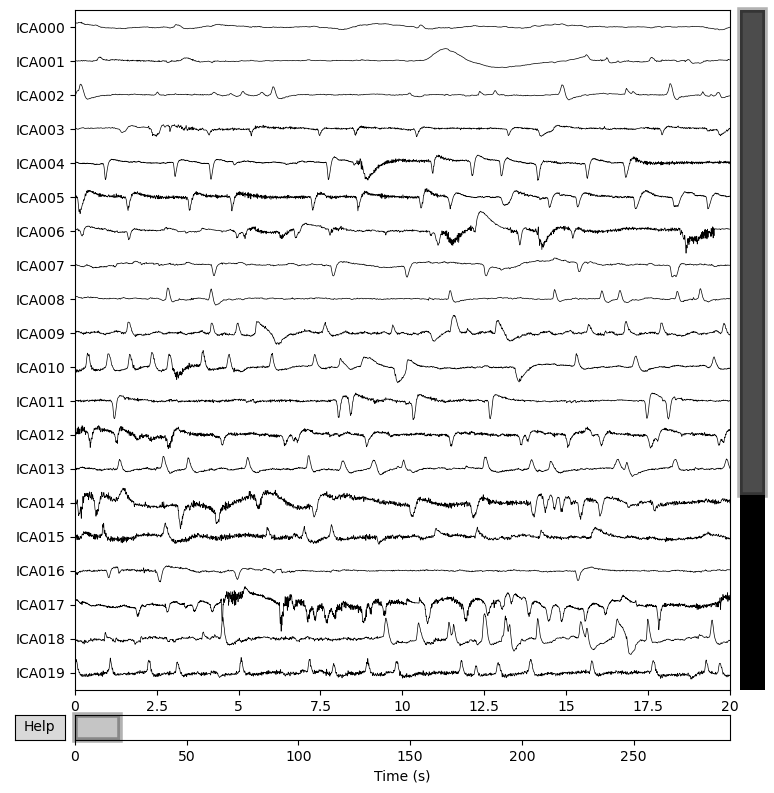

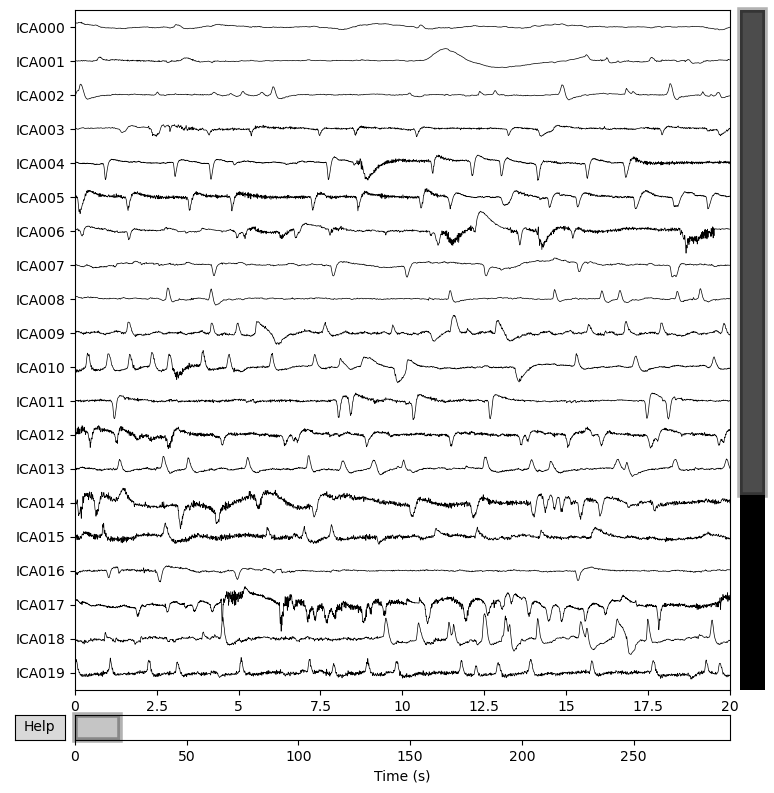

In [67]:
 ica.plot_sources(raw, block=False)

for component 0 blink are [4]


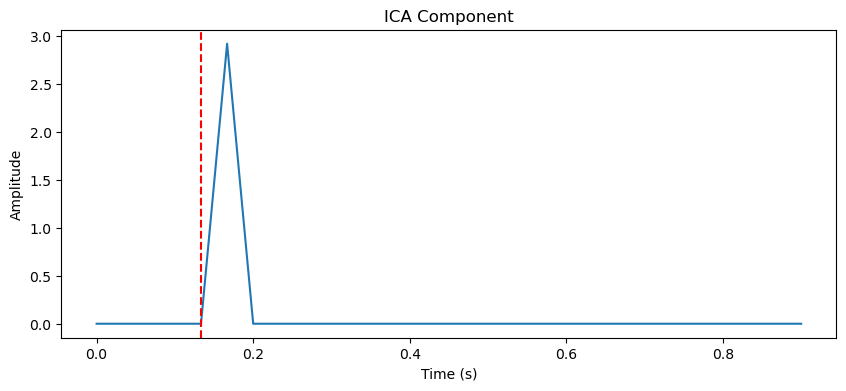

for component 1 blink are [1, 4, 12, 15]


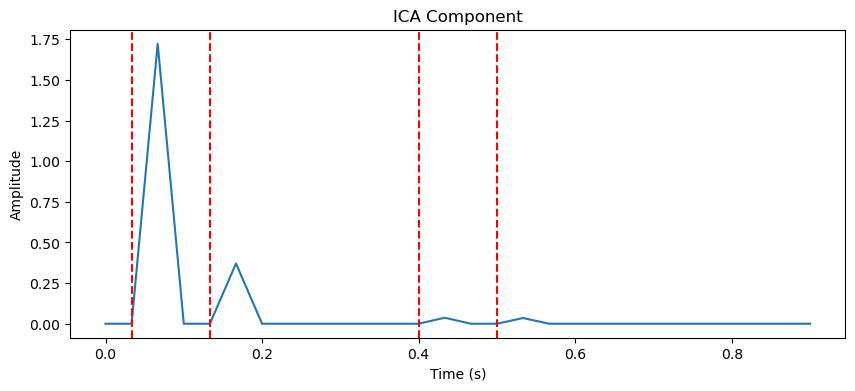

for component 2 blink are [19]


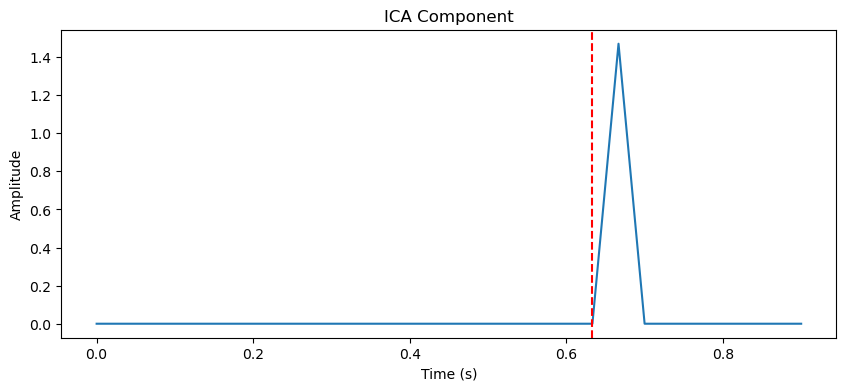

for component 3 blink are [1, 5]


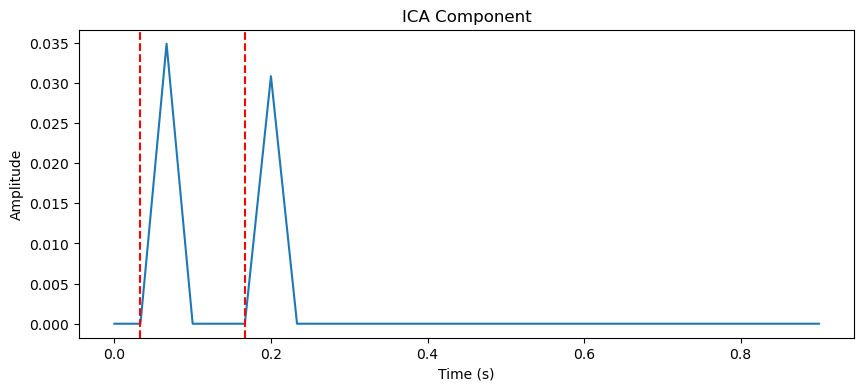

for component 4 blink are [10, 19]


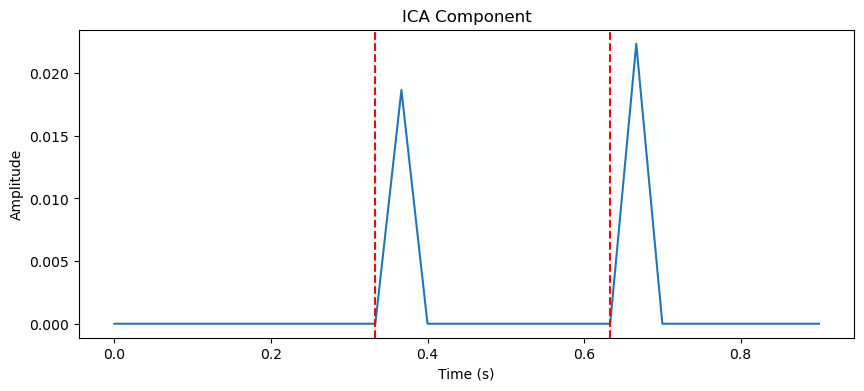

for component 5 blink are [4]


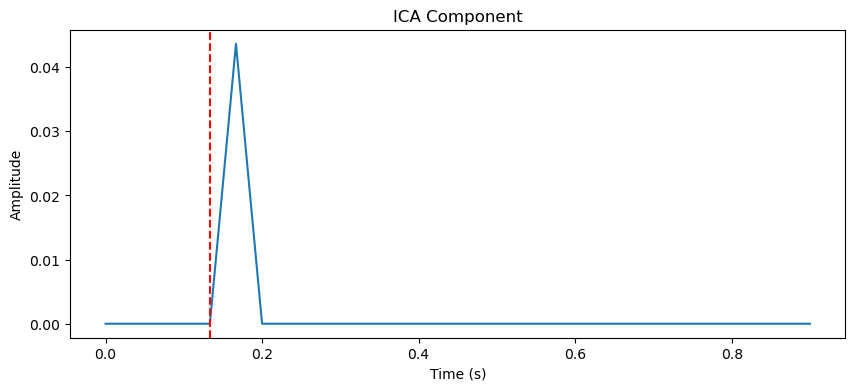

for component 6 blink are [4, 8, 21]


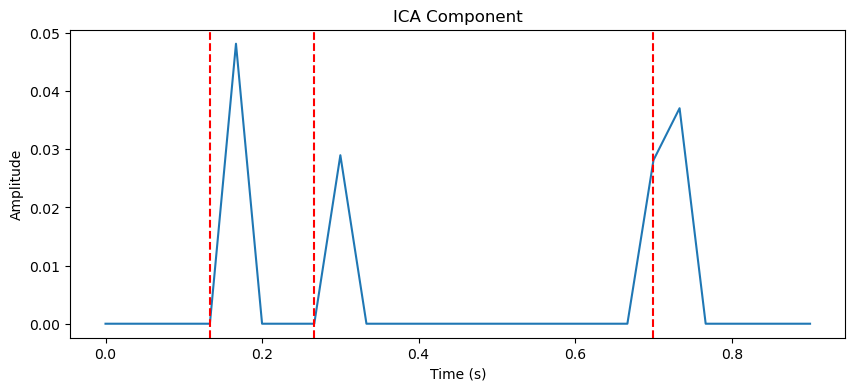

for component 7 blink are [17]


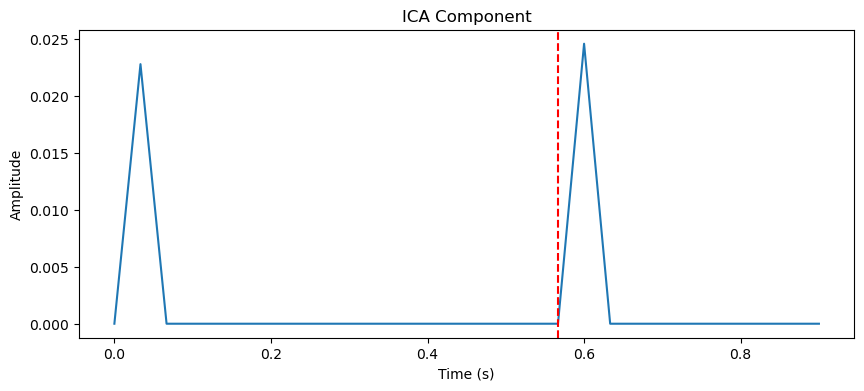

for component 8 blink are [1, 4, 9, 19, 21, 24]


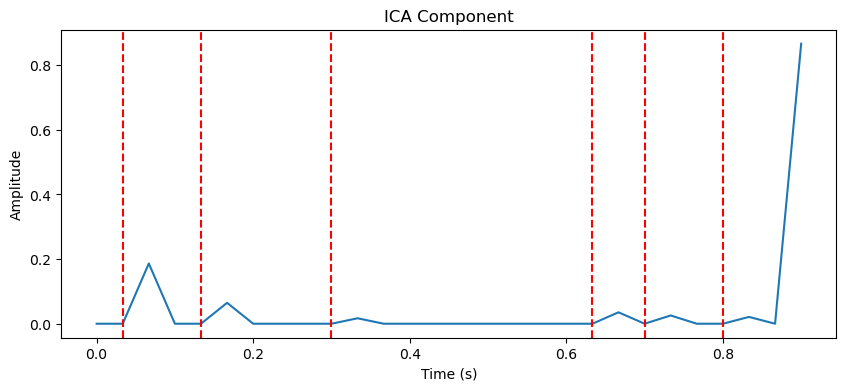

for component 9 blink are [2, 4, 13]


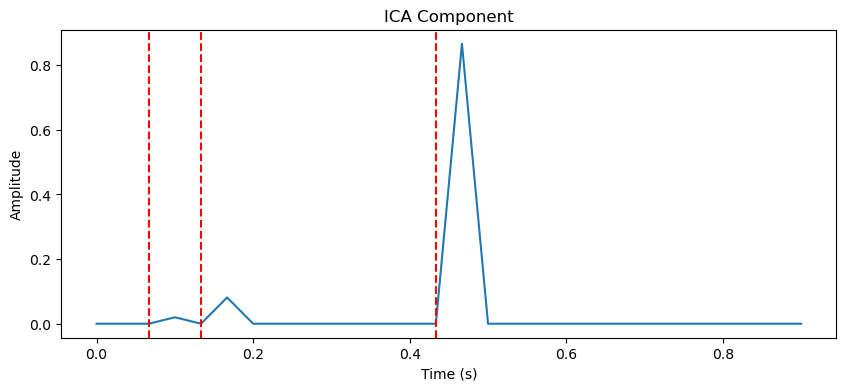

for component 10 blink are [1, 4, 10]


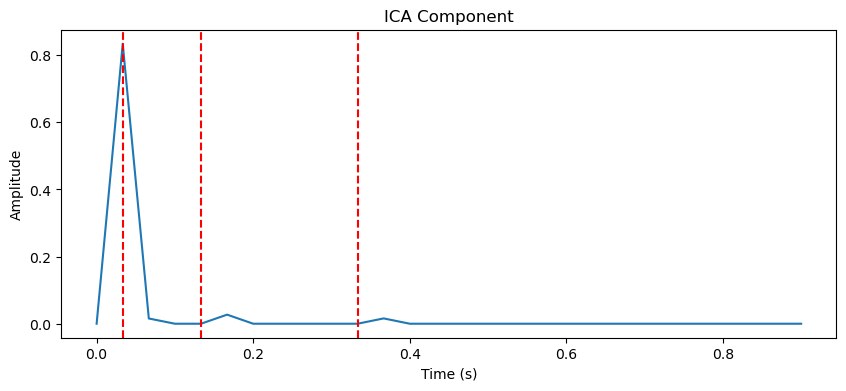

for component 11 blink are [12]


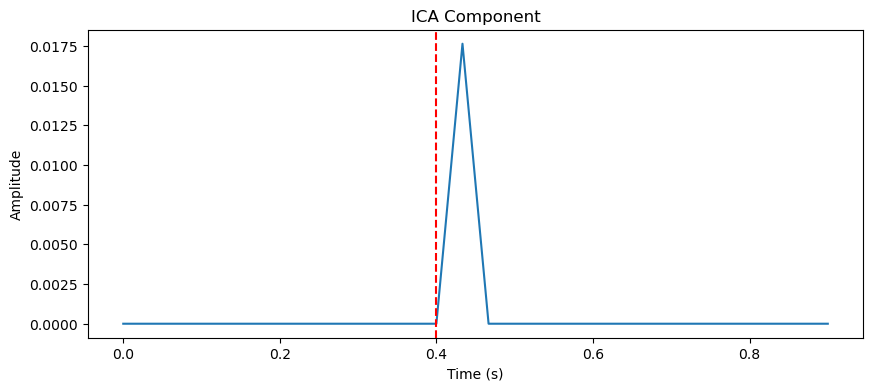

for component 12 blink are [19]


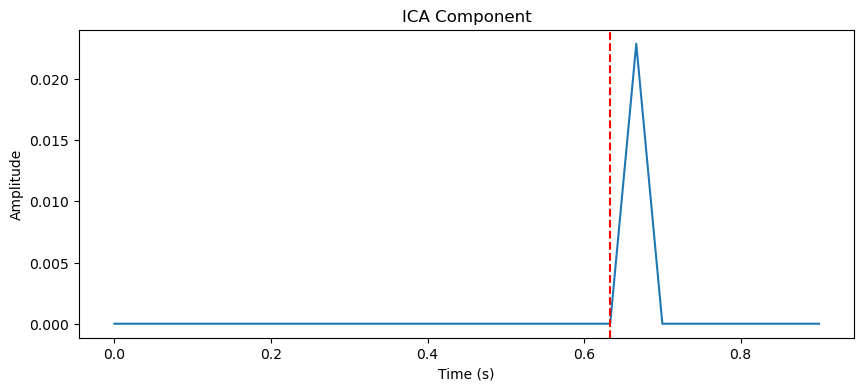

for component 13 blink are [10, 24]


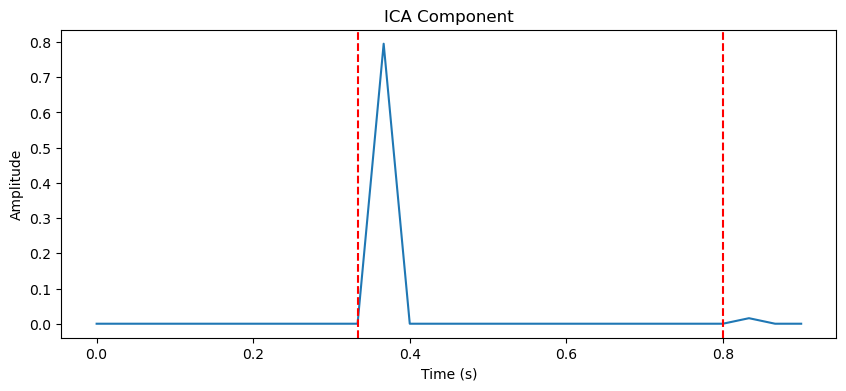

for component 14 blink are [4, 15]


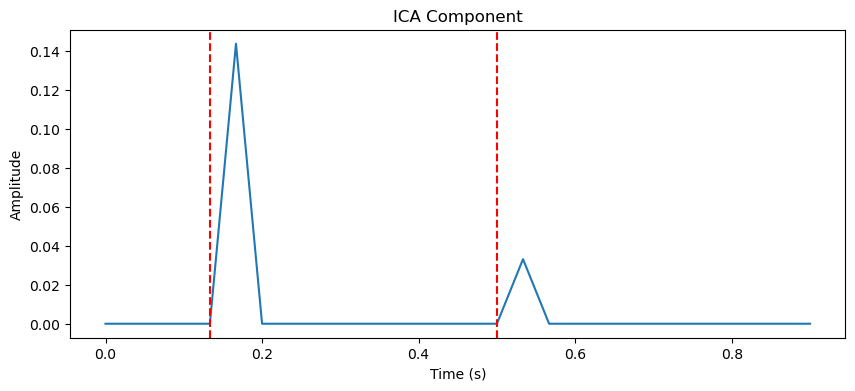

for component 15 blink are [1, 6, 21]


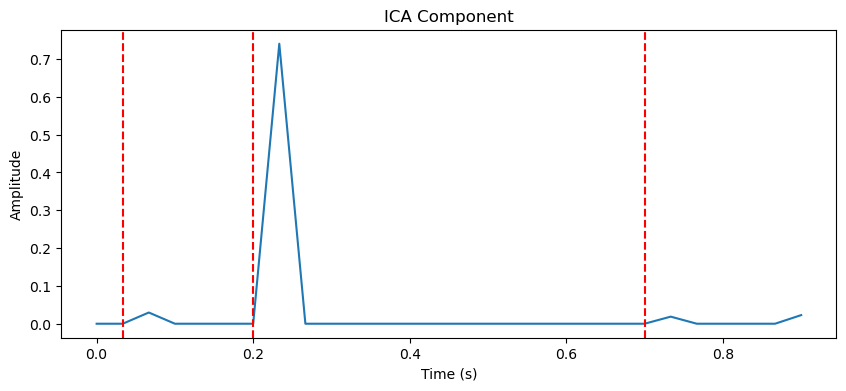

for component 16 blink are [4, 7, 9, 16]


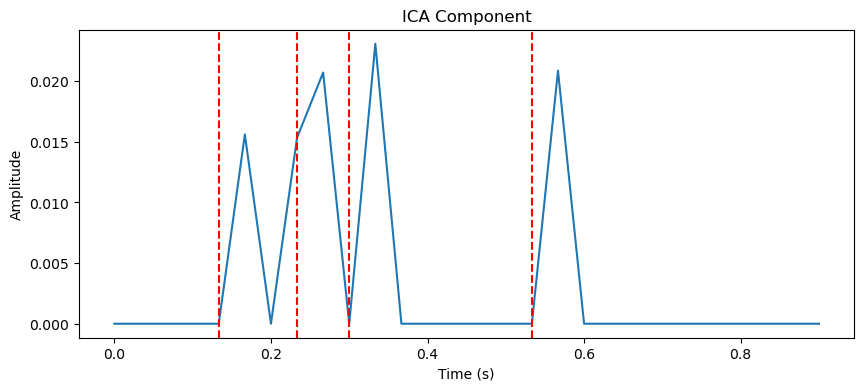

for component 17 blink are [4, 16, 23]


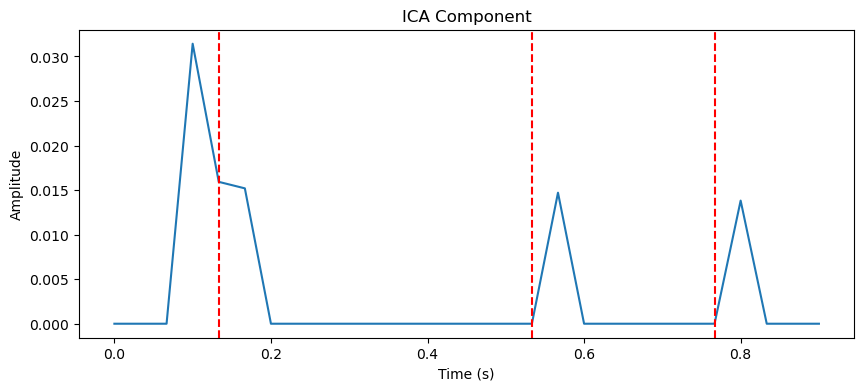

for component 18 blink are [7, 13, 16, 19]


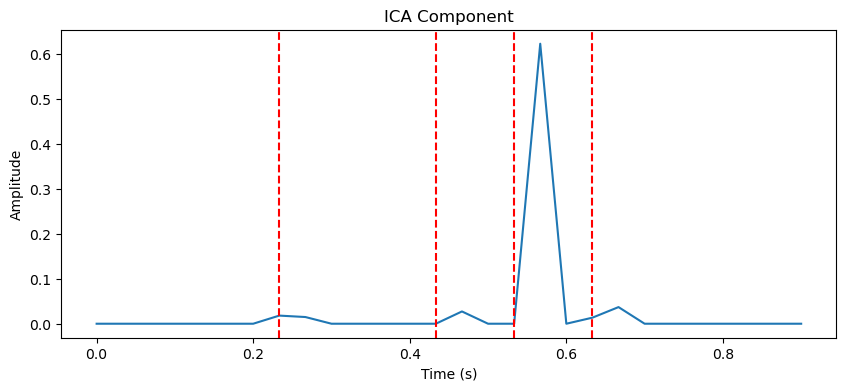

for component 19 blink are [4, 13, 19]


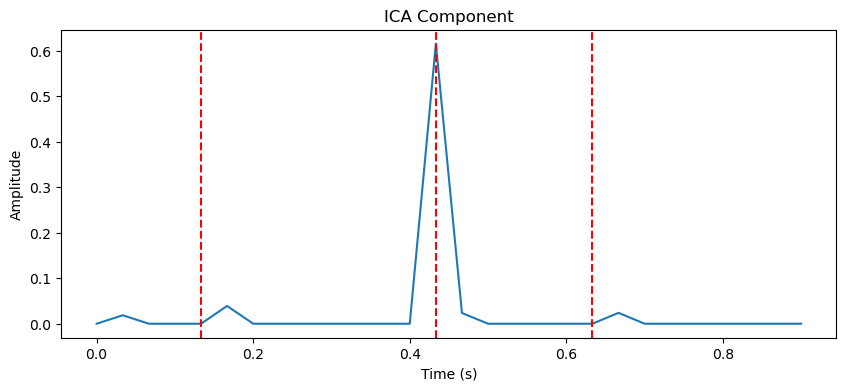

for component 20 blink are [4, 13, 20]


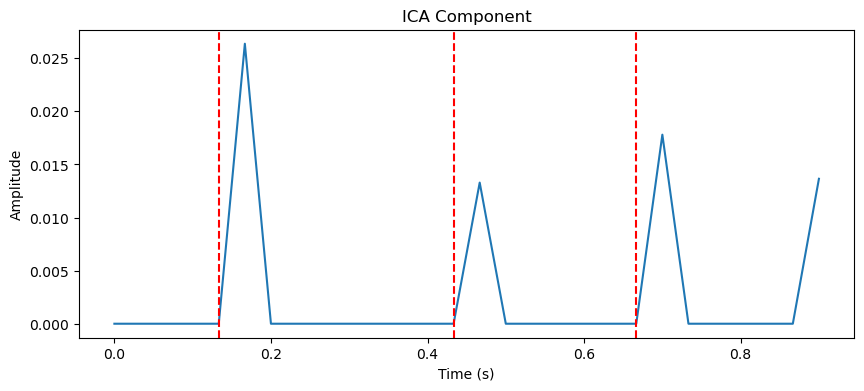

for component 21 blink are [8, 22]


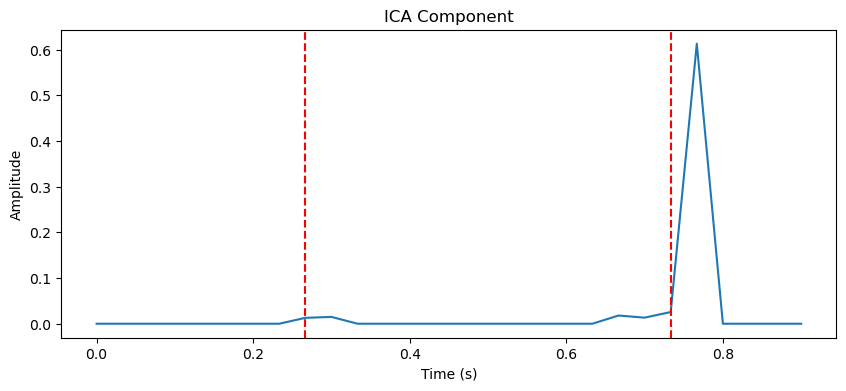

for component 22 blink are [14]


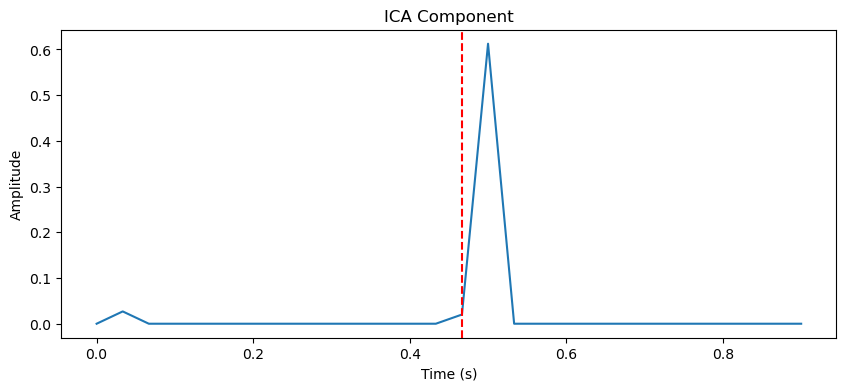

for component 23 blink are [4]


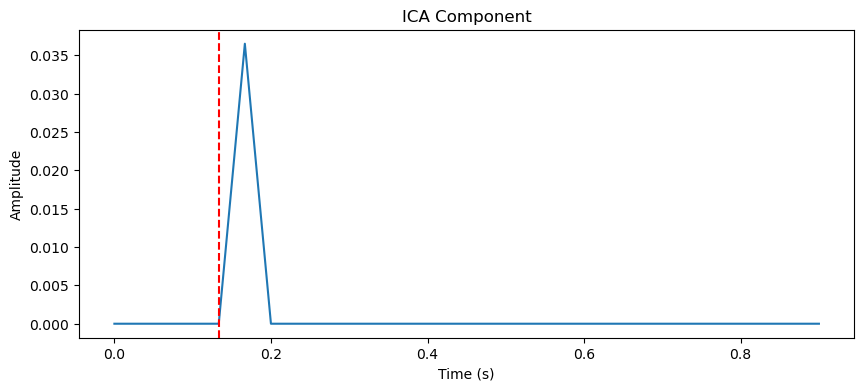

for component 24 blink are []


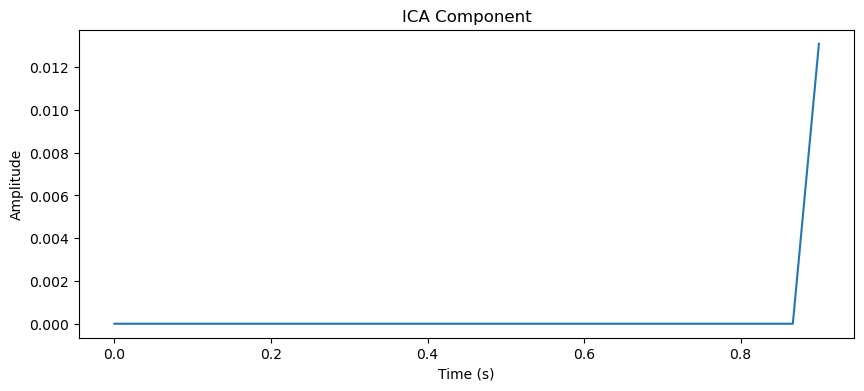

for component 25 blink are [2, 4, 14, 19, 22, 24]


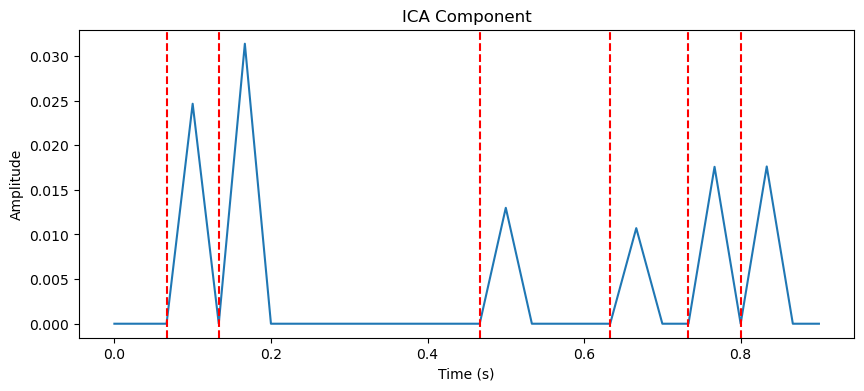

for component 26 blink are [7, 13, 16, 23]


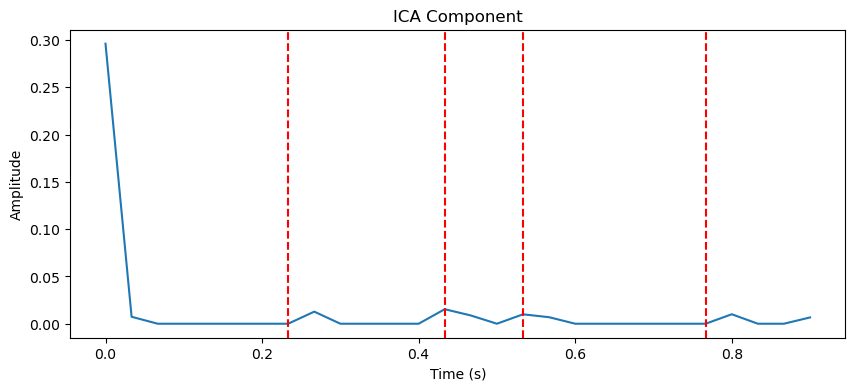

for component 27 blink are [1, 4, 11, 17, 22, 25]


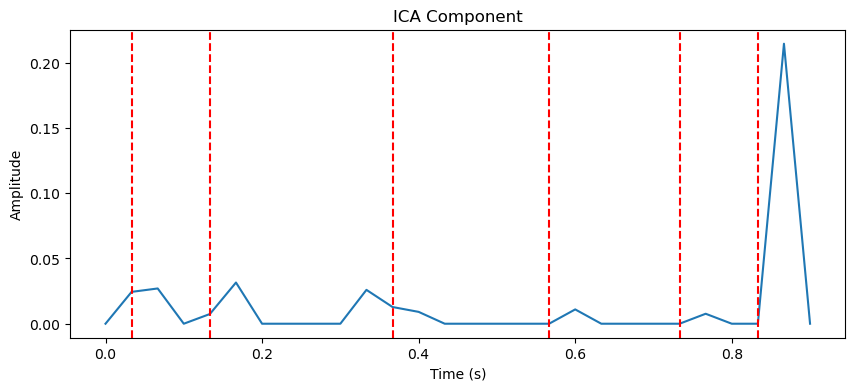

total number of blinks = 73


In [68]:
import numpy as np
from scipy.signal import find_peaks

def segment(y):
    """Extracts continuous segments of non-zero values from y."""
    s = np.concatenate(([0], np.flatnonzero(y), [len(y)]))
    return [y[s[i]:s[i+1]] for i in range(len(s)-1)], s

def blink_detection(y, fs):
    # Convert y to a NumPy array if it isn't already
    if not isinstance(y, np.ndarray):
        y = np.array(y)
    
    """Detects blinks in a blink component y sampled at frequency fs."""
    lmin = fs // 50
    wmin = fs // 25
    wmax = fs
    
    # Calculate threshold as standard deviation of y
    threshold = 0.1* np.std(y)
    
    # Set all values below the threshold to zero
    y[y < threshold] = 0
    
    # Extract continuous segments of non-zero values from y
    Y, s = segment(y)
    #print("Y",Y)
    #print("s",s)
    t = []
    l = 0
    
    for j in range(len(Y)):
        N = len(Y[j])
        x = np.arange(N)
      
        # Find polynomial coefficients that fit Y[j]
        p = 3  # degree of polynomial
        X = np.vander(x, p+1)
       
        a = np.linalg.lstsq(X, Y[j], rcond=None)[0]
        
        # Compute the arc length of the fitted curve
       
        curve = np.polyval(a[::-1], x)
        try:
            alen = np.sum(np.sqrt(1 + np.gradient(curve)**2)) / N
        except ValueError:
            # Continue if an error occurs
            continue
        #print("j",j)   
        if wmin < N and N < wmax and lmin < alen:
            # Find the peak value and position within Y[j]
            #print("j",j)
            v = np.max(Y[j])
            p = np.argmax(Y[j])
            
            # Compute the angle between the peak and the ends of the curve
            alpha1 = 180/np.pi * np.arctan2(v - np.polyval(a[::-1], 0), p/fs)
            alpha2 = 180/np.pi * np.arctan2(v - np.polyval(a[::-1], N-1), (N-p-1)/fs)
            
            if alpha1 > 80 and alpha2 < 100:
                tl = s[j] + p - 1
                if(tl>0):
                    t.append(tl)
                    l += 1
    
    return t

b=0
e=0
fs = 30 # example sampling frequency
for i in range(ica.n_components_):
        component = ica.get_components()[:, i]
        blink_indices = blink_detection(component, fs)
        #b=b+sum(blink_indices)
        e=e+len(blink_indices)
        print("for component",i,"blink are",blink_indices)
        # Create a time axis based on the sampling frequency
        t = np.arange(len(component)) / fs
        # Plot the component signal
        plt.figure(figsize=(10, 4))
        plt.plot(t, component)
        plt.title('ICA Component')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        # Plot vertical lines at the times of the detected blinks
        for blink_index in blink_indices:
            plt.axvline(x=t[blink_index], color='r', linestyle='--')
    
        plt.show()
print("total number of blinks =",e)

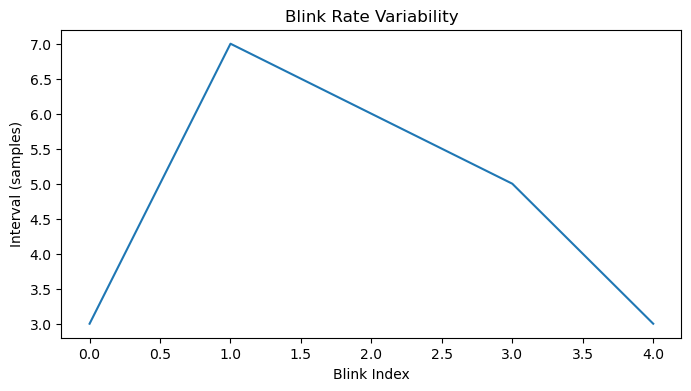

In [69]:
# Calculate blink rate variability
brv = []
for i in range(len(blink_indices)-1):
    brv.append(blink_indices[i+1] - blink_indices[i])

# Plot blink rate variability
plt.figure(figsize=(8, 4))
plt.plot(brv)
plt.title('Blink Rate Variability')
plt.xlabel('Blink Index')
plt.ylabel('Interval (samples)')
plt.show()

Effective window size : 0.109 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


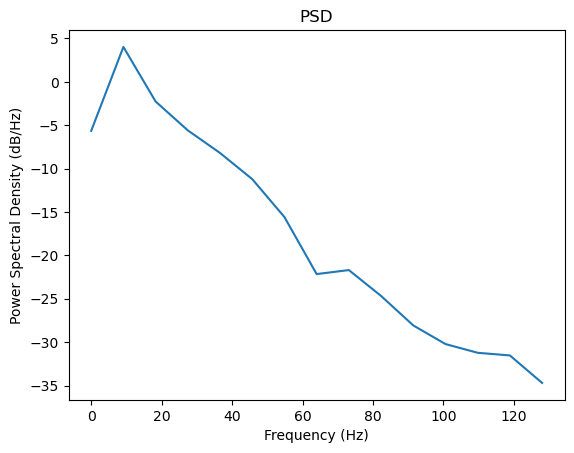

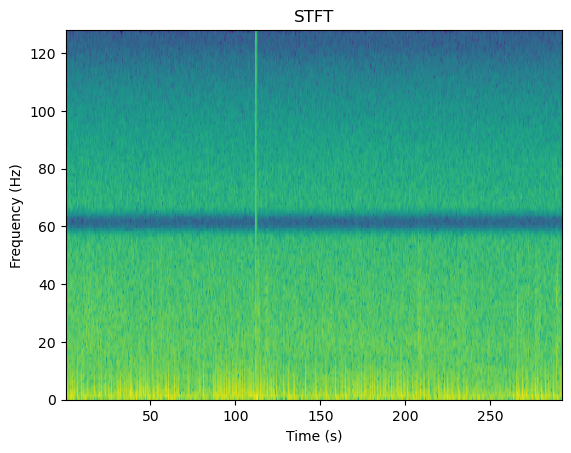

In [70]:
raw_band = raw.copy()

# Calculate power spectral density
n_fft = 28
psd, freqs = mne.time_frequency.psd_array_welch(raw_band.get_data()[0], sfreq=raw_band.info['sfreq'],n_fft=n_fft)

# Plot PSD
plt.figure()
plt.plot(freqs, 10 * np.log10(psd))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB/Hz)')
plt.title('PSD')

# Plot STFT
plt.figure()
plt.specgram(raw.get_data()[0], Fs=raw_band.info['sfreq'])
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('STFT')

plt.show()

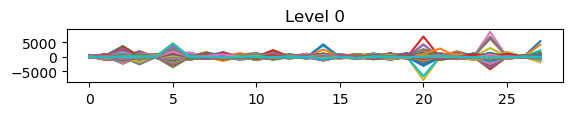

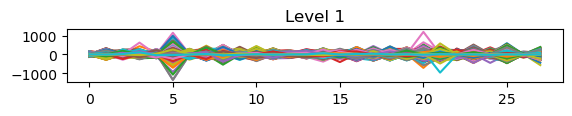

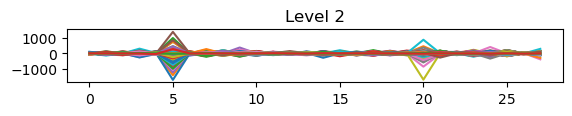

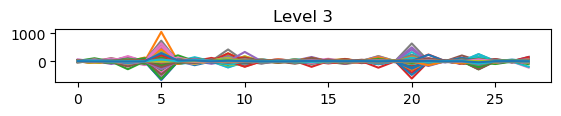

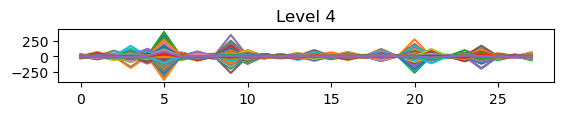

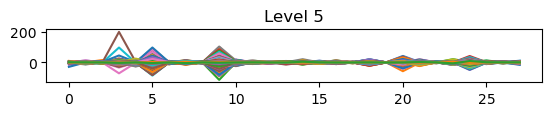

mean_spectrum: [1.00212951e+05 4.23711682e+03 6.33238401e+02 2.11604468e+02
 5.27936986e+01 3.25474082e+00]
var_spectrum: [2.85760986e+10 7.46217201e+06 1.11444009e+06 1.01886285e+05
 5.05531740e+03 3.92032578e+01]


In [71]:
import pywt
import numpy as np

# Load the raw EEG data (assuming it is in the form of a 1D numpy array)
eeg_data= raw.get_data()

# Define the wavelet and decomposition level
wavelet = 'db4'
decomp_level = 5

# Perform the wavelet decomposition
coeffs = pywt.wavedec(eeg_data, wavelet, level=decomp_level)

# Plot the wavelet coefficients for each level (optional)
import matplotlib.pyplot as plt
plt.figure()
for i in range(decomp_level + 1):
    plt.subplot(decomp_level + 1, 1, i + 1)
    plt.plot(coeffs[i])
    plt.title('Level %d' % i)
    plt.show()
# Perform wavelet reconstruction (optional)
reconstructed_signal = pywt.waverec(coeffs, wavelet)

# Extract features from wavelet coefficients
# For example, you could calculate the power spectrum of each level
power_spectrum = []
for c in coeffs:
    power = np.abs(c)**2
    mean_power = np.mean(power, axis=1)
    power_spectrum.append(mean_power)
power_spectrum = np.array(power_spectrum)


#power_spectrum = np.array([np.abs(c)**2 for c in coeffs])

# Perform statistical analysis on the features (optional)
# For example, you could calculate the mean and variance of each level's power spectrum
mean_spectrum = np.mean(power_spectrum, axis=1)
var_spectrum = np.var(power_spectrum, axis=1)

#print("power_spectrum:",power_spectrum)
print("mean_spectrum:",mean_spectrum)
print("var_spectrum:",var_spectrum)

for remaing data apart from first 28 subjects.

In [72]:
data = df2.iloc[:, :-2].values
ch_names = ['Fp1']*23
# extract the data values and the channel names
ch_types = ['eeg']*23
# create the info object for the raw data
sfreq = 256  # the sampling frequency of the data in Hz
info = mne.create_info(ch_names, sfreq,ch_types)
# create the raw object
raw = mne.io.RawArray(data, info)


Creating RawArray with float64 data, n_channels=23, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   292.965 secs
Ready.


C:\Users\Dedu\AppData\Local\Temp\ipykernel_25636\2646477564.py:7: RuntimeWarning: Channel names are not unique, found duplicates for: {'Fp1'}. Applying running numbers for duplicates.
  info = mne.create_info(ch_names, sfreq,ch_types)


In [73]:
import numpy as np
import matplotlib.pyplot as plt
from mne.preprocessing import ICA
from mne.preprocessing import create_eog_epochs

picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=False)

# fit ICA using the filtered data and specified picks

ica = ICA(random_state=0)
ica.fit(raw, picks=picks)


Fitting ICA to data using 23 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 23 components


C:\Users\Dedu\AppData\Local\Temp\ipykernel_25636\1187533214.py:11: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw, picks=picks)


Fitting ICA took 0.7s.


Method,fastica
Fit,23 iterations on raw data (75000 samples)
ICA components,23
Available PCA components,23
Channel types,eeg
ICA components marked for exclusion,—


Creating RawArray with float64 data, n_channels=23, n_times=75000
    Range : 0 ... 74999 =      0.000 ...   292.965 secs
Ready.


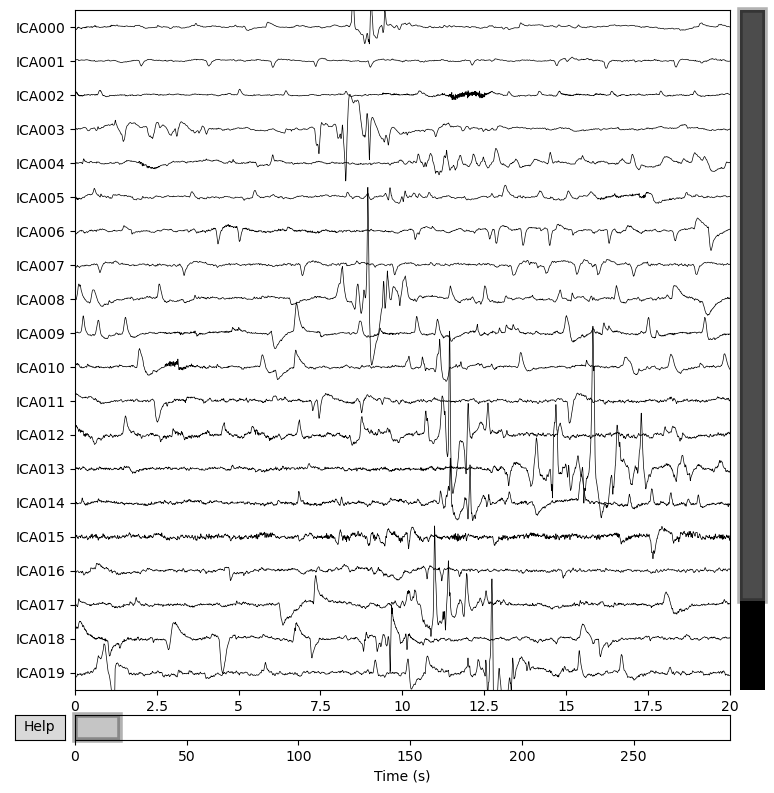

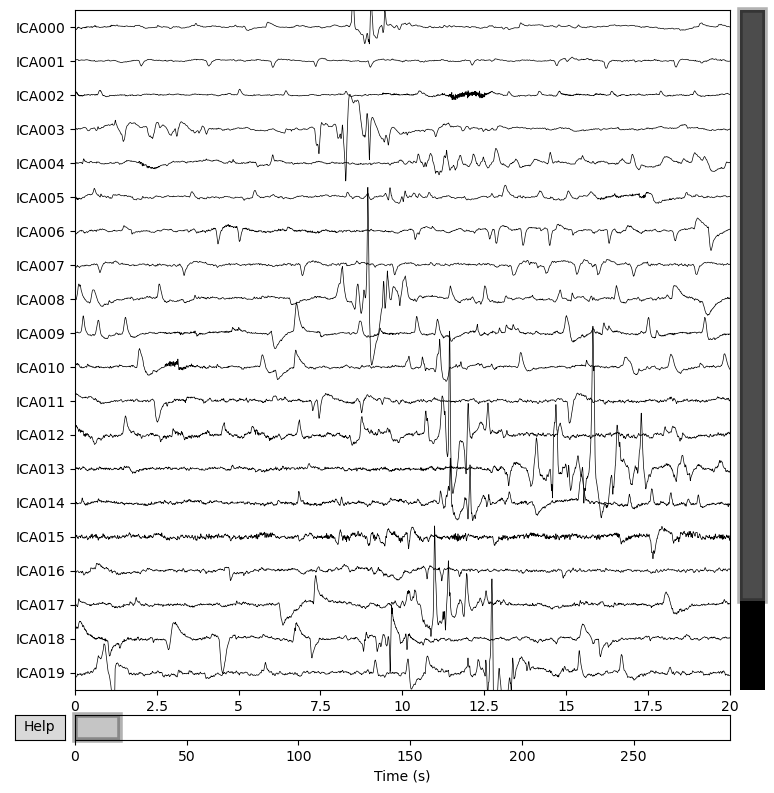

In [74]:
 ica.plot_sources(raw, block=False)

for component 0 blink are [2]


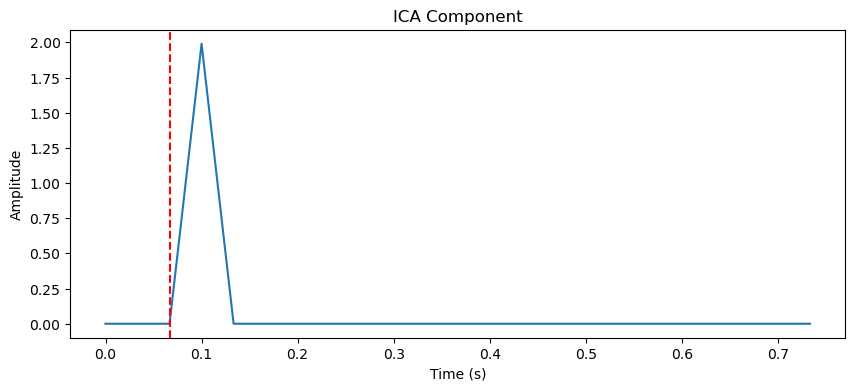

for component 1 blink are [2]


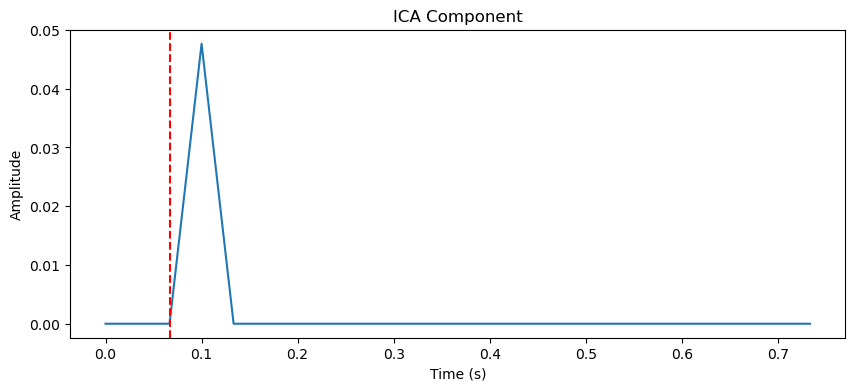

for component 2 blink are [5, 9]


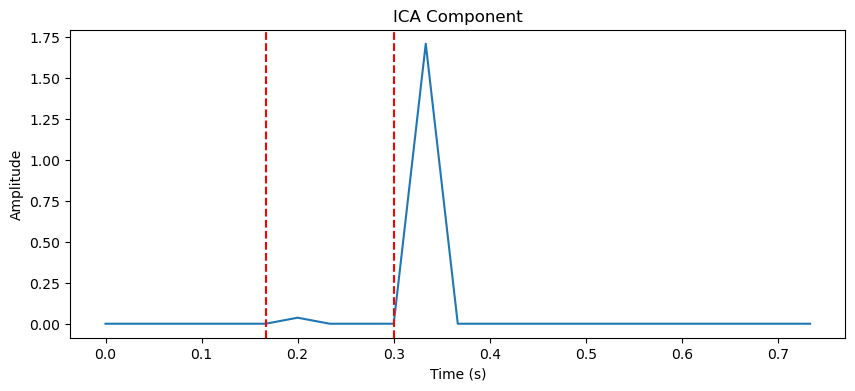

for component 3 blink are []


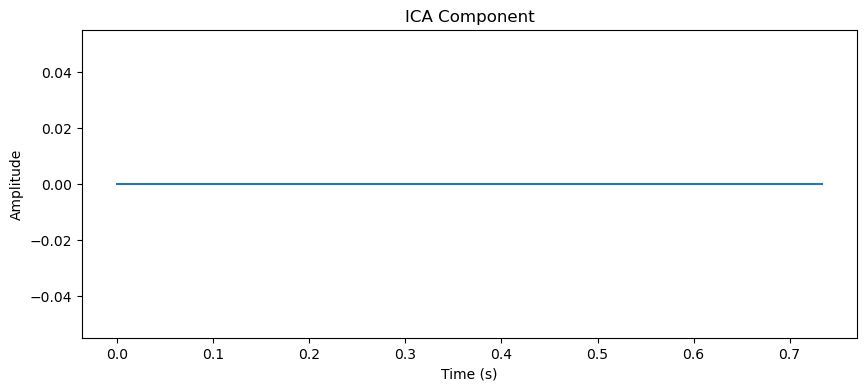

for component 4 blink are [20]


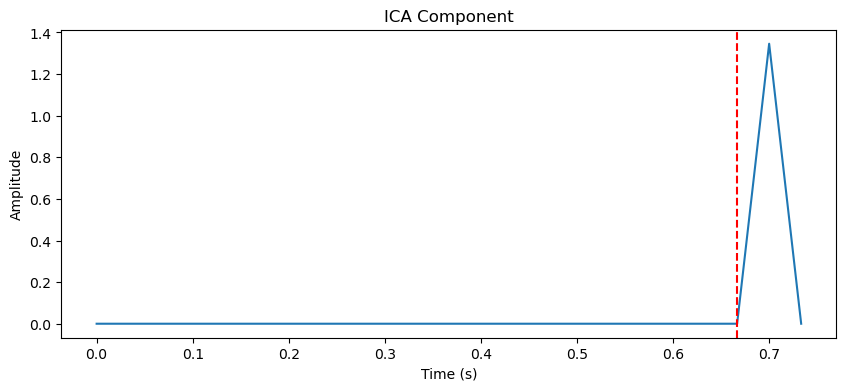

for component 5 blink are [18, 20]


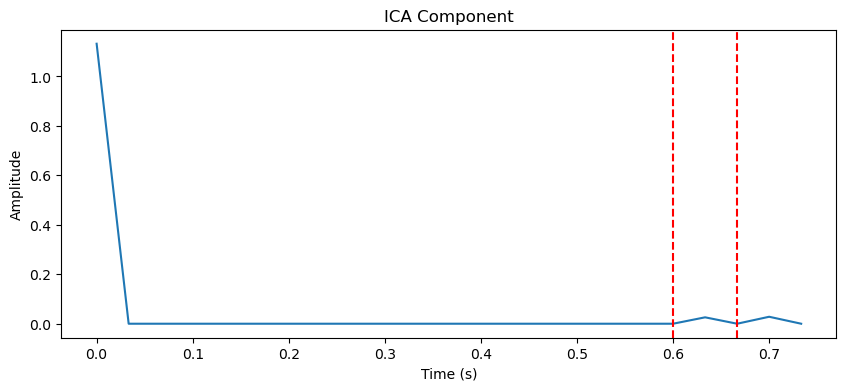

for component 6 blink are []


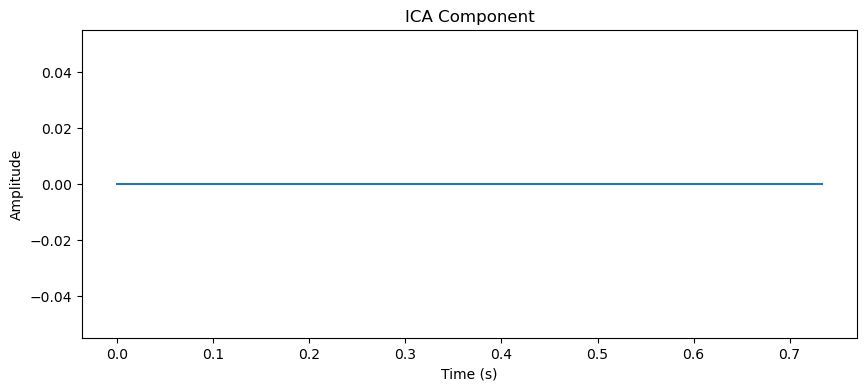

for component 7 blink are []


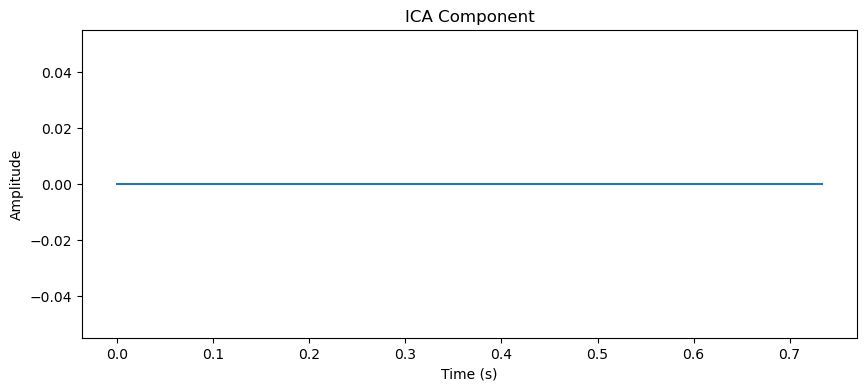

for component 8 blink are [2, 5, 11]


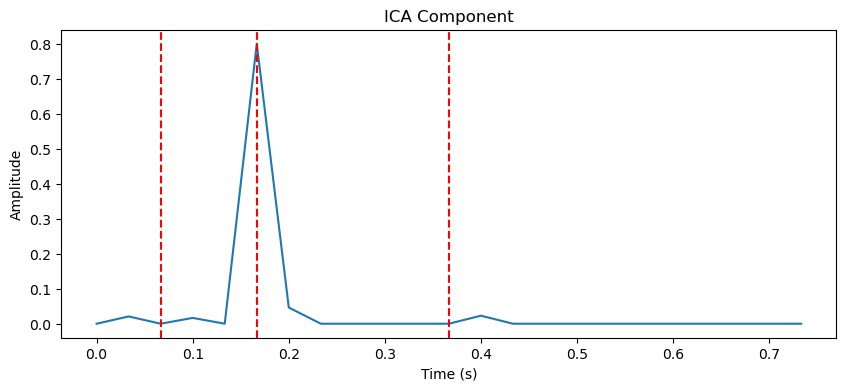

for component 9 blink are [5, 19]


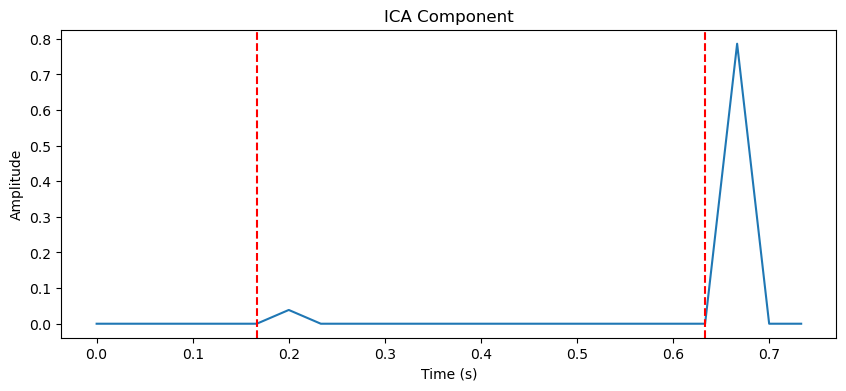

for component 10 blink are [3, 5, 16]


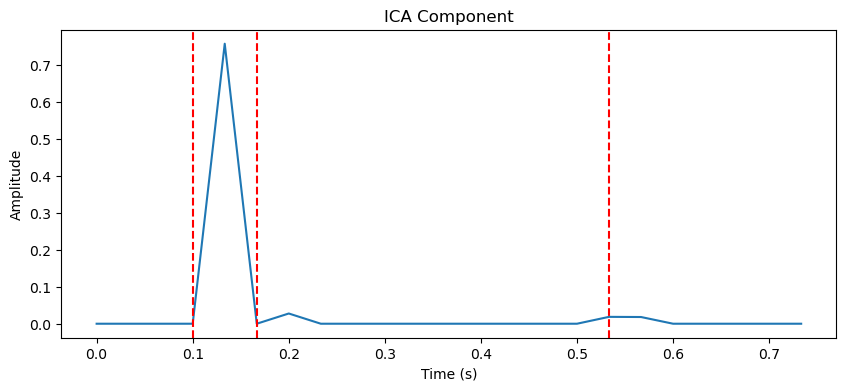

for component 11 blink are [2]


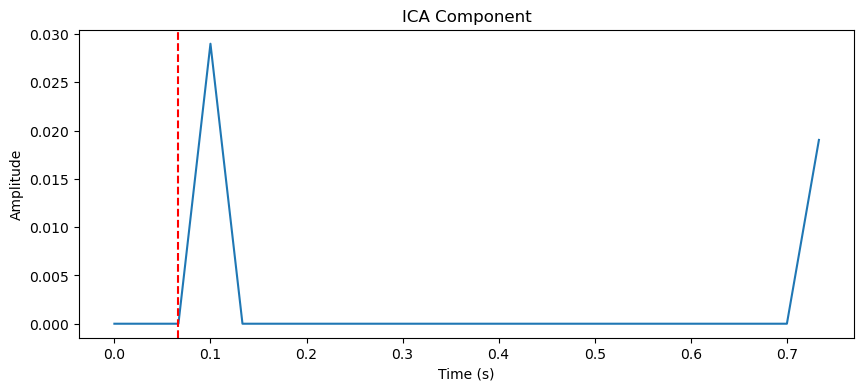

for component 12 blink are [4, 9, 16, 18, 20]


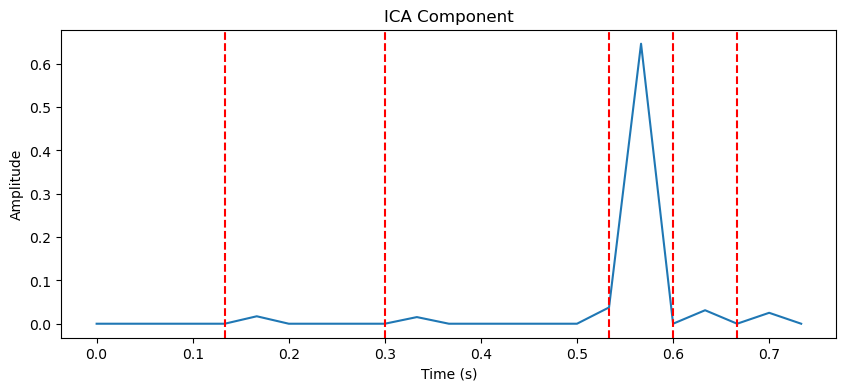

for component 13 blink are [6, 17]


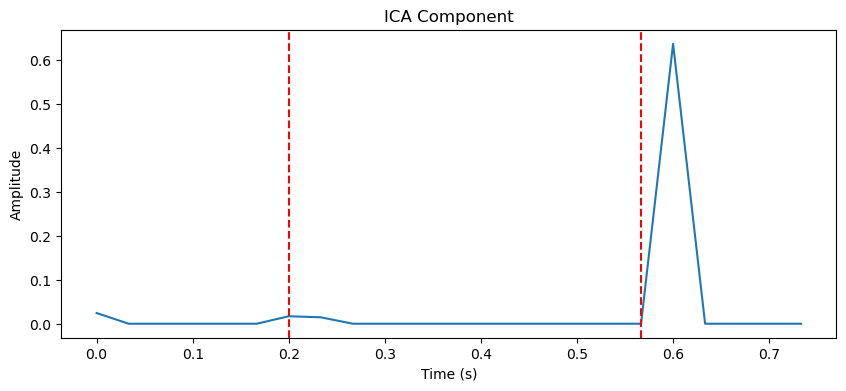

for component 14 blink are [2, 9, 16]


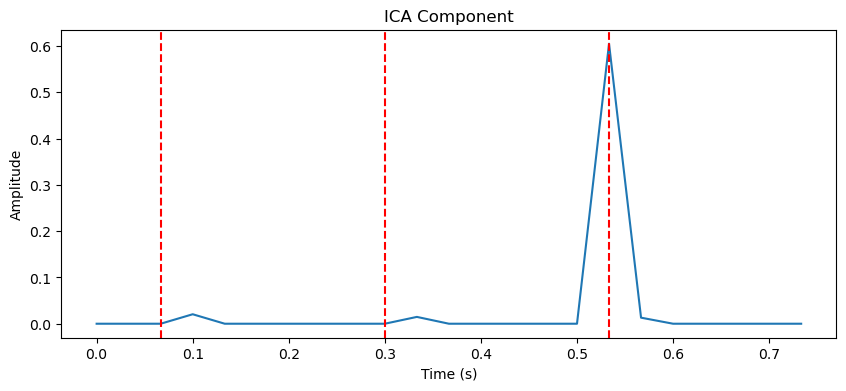

for component 15 blink are [2, 14]


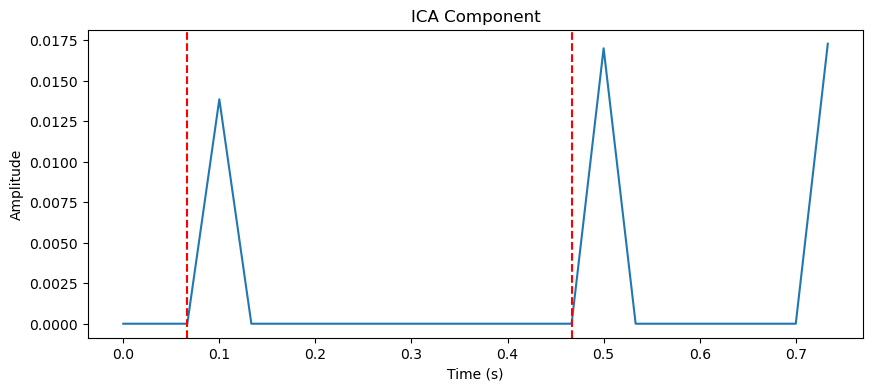

for component 16 blink are [4, 9, 13, 15, 19]


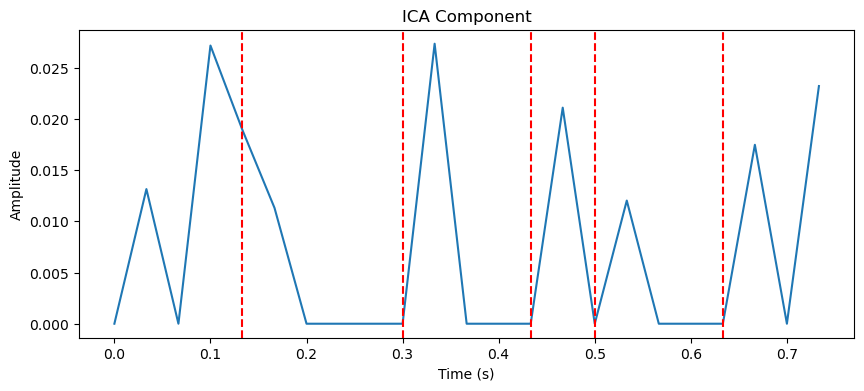

for component 17 blink are [3, 5, 10, 19]


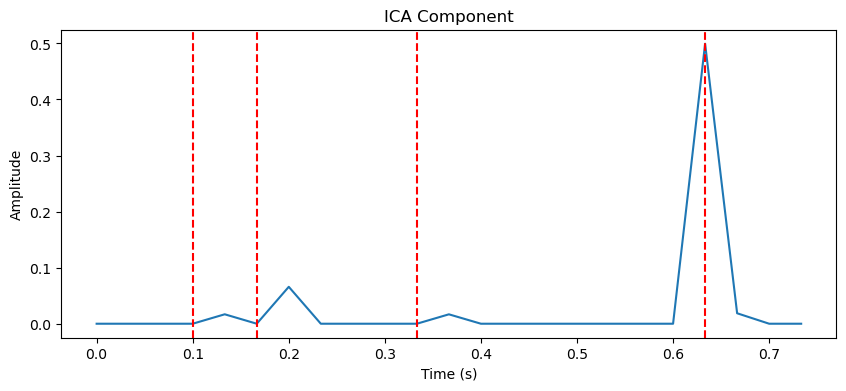

for component 18 blink are [1, 5, 9, 11]


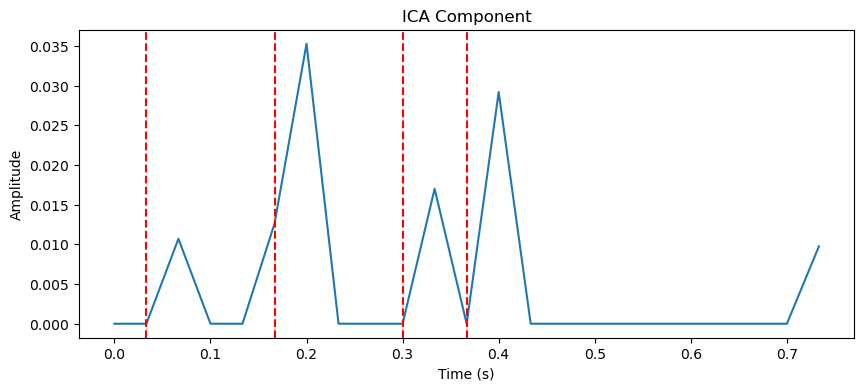

for component 19 blink are [2, 5, 12, 17]


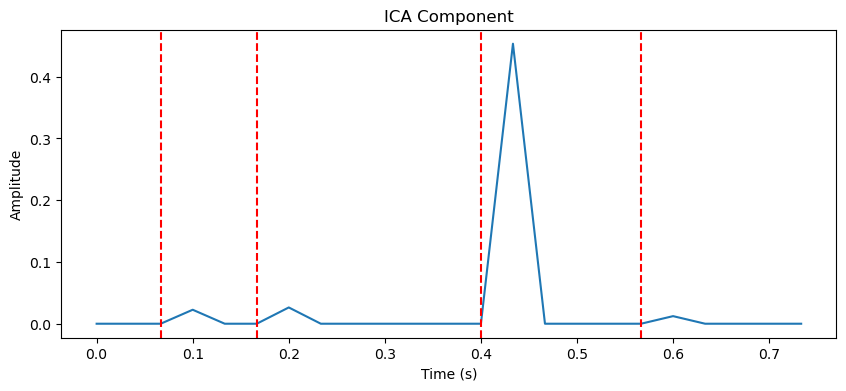

for component 20 blink are [6, 13, 16, 18]


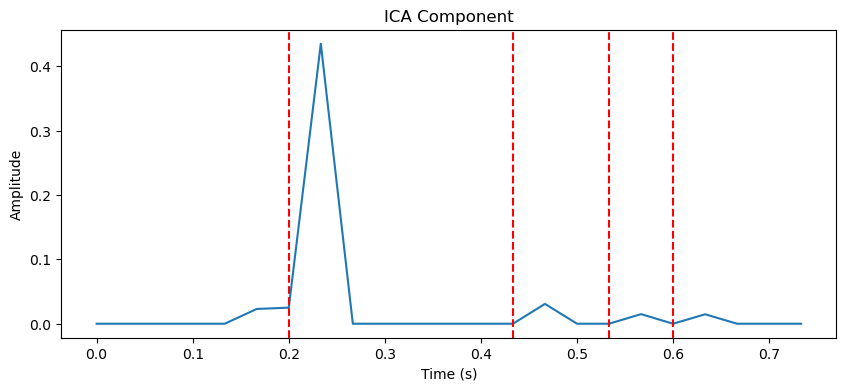

for component 21 blink are [1, 19]


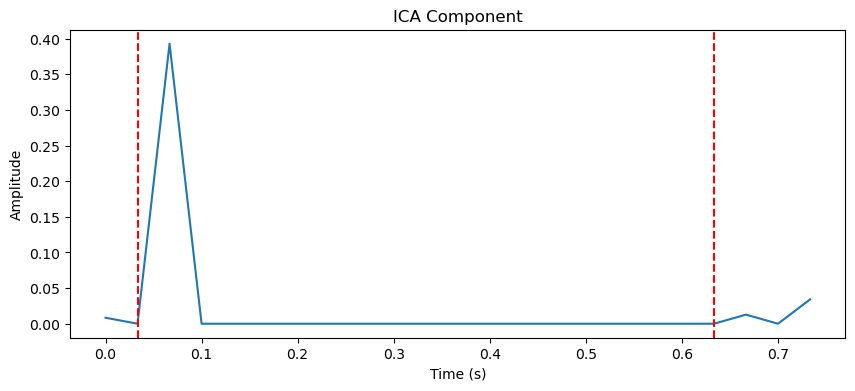

for component 22 blink are [2, 9, 12]


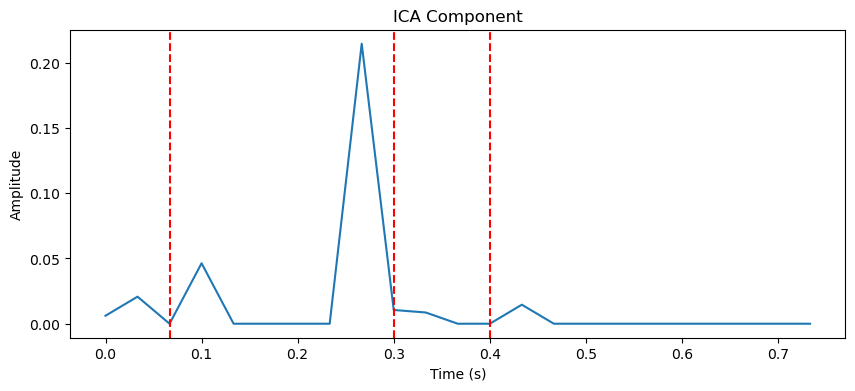

total number of blinks = 54


In [86]:
import numpy as np
from scipy.signal import find_peaks

def segment(y):
    """Extracts continuous segments of non-zero values from y."""
    s = np.concatenate(([0], np.flatnonzero(y), [len(y)]))
    return [y[s[i]:s[i+1]] for i in range(len(s)-1)], s

def blink_detection(y, fs):
    # Convert y to a NumPy array if it isn't already
    if not isinstance(y, np.ndarray):
        y = np.array(y)
    
    """Detects blinks in a blink component y sampled at frequency fs."""
    lmin = fs // 50
    wmin = fs // 25
    wmax = fs
    
    # Calculate threshold as standard deviation of y
    threshold = 0.1* np.std(y)
    
    # Set all values below the threshold to zero
    y[y < threshold] = 0
    
    # Extract continuous segments of non-zero values from y
    Y, s = segment(y)
    #print("Y",Y)
    #print("s",s)
    t = []
    l = 0
    
    for j in range(len(Y)):
        N = len(Y[j])
        x = np.arange(N)
      
        # Find polynomial coefficients that fit Y[j]
        p = 3  # degree of polynomial
        X = np.vander(x, p+1)
       
        a = np.linalg.lstsq(X, Y[j], rcond=None)[0]
        
        # Compute the arc length of the fitted curve
       
        curve = np.polyval(a[::-1], x)
        try:
            alen = np.sum(np.sqrt(1 + np.gradient(curve)**2)) / N
        except ValueError:
            # Continue if an error occurs
            continue
        #print("j",j)   
        if wmin < N and N < wmax and lmin < alen:
            # Find the peak value and position within Y[j]
            #print("j",j)
            v = np.max(Y[j])
            p = np.argmax(Y[j])
            
            # Compute the angle between the peak and the ends of the curve
            alpha1 = 180/np.pi * np.arctan2(v - np.polyval(a[::-1], 0), p/fs)
            alpha2 = 180/np.pi * np.arctan2(v - np.polyval(a[::-1], N-1), (N-p-1)/fs)
            
            if alpha1 > 80 and alpha2 < 100:
                tl = s[j] + p - 1
                if(tl>0):
                    t.append(tl)
                    l += 1
    
    return t

b=0
e=0
fs = 30 # example sampling frequency
for i in range(ica.n_components_):
        component = ica.get_components()[:, i]
        blink_indices = blink_detection(component, fs)
        #b=b+sum(blink_indices)
        e=e+len(blink_indices)
        print("for component",i,"blink are",blink_indices)
        # Create a time axis based on the sampling frequency
        t = np.arange(len(component)) / fs
        # Plot the component signal
        plt.figure(figsize=(10, 4))
        plt.plot(t, component)
        plt.title('ICA Component')
        plt.xlabel('Time (s)')
        plt.ylabel('Amplitude')
        # Plot vertical lines at the times of the detected blinks
        for blink_index in blink_indices:
            plt.axvline(x=t[blink_index], color='r', linestyle='--')
    
        plt.show()
print("total number of blinks =",e)

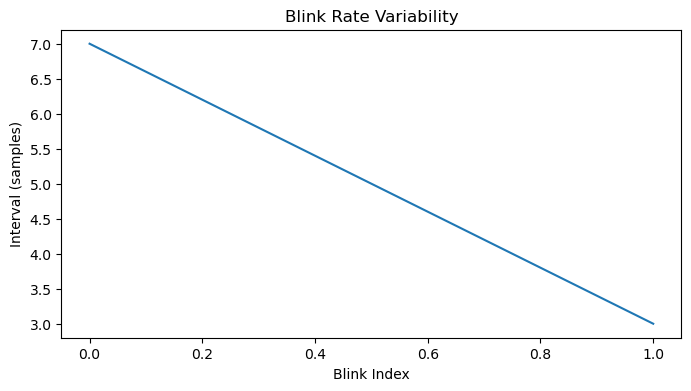

In [87]:
# Calculate blink rate variability
brv = []
for i in range(len(blink_indices)-1):
    brv.append(blink_indices[i+1] - blink_indices[i])

# Plot blink rate variability
plt.figure(figsize=(8, 4))
plt.plot(brv)
plt.title('Blink Rate Variability')
plt.xlabel('Blink Index')
plt.ylabel('Interval (samples)')
plt.show()


Effective window size : 0.090 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


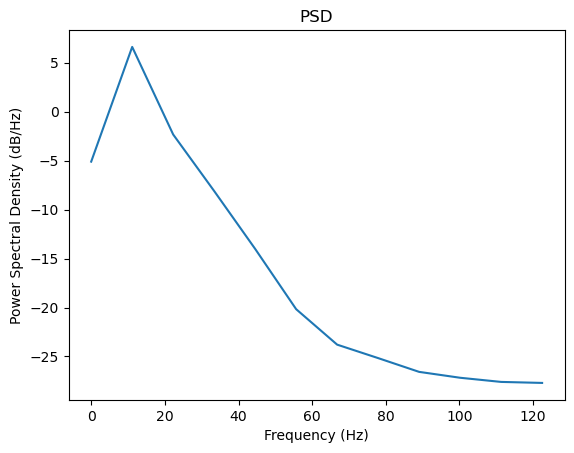

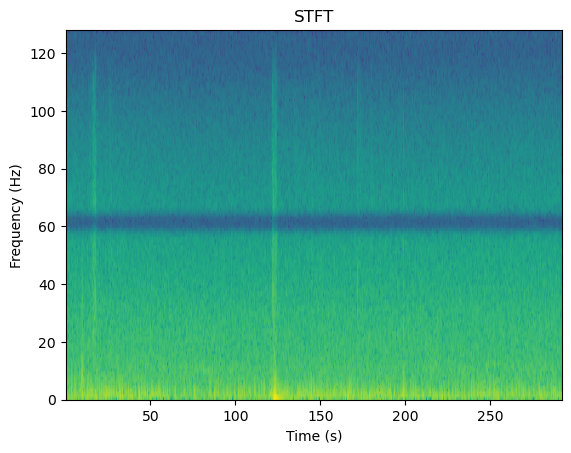

In [77]:
raw_band = raw.copy()

# Calculate power spectral density
n_fft = 23
psd, freqs = mne.time_frequency.psd_array_welch(raw_band.get_data()[0], sfreq=raw_band.info['sfreq'],n_fft=n_fft)

# Plot PSD
plt.figure()
plt.plot(freqs, 10 * np.log10(psd))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB/Hz)')
plt.title('PSD')

# Plot STFT
plt.figure()
plt.specgram(raw.get_data()[0], Fs=raw_band.info['sfreq'])
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('STFT')

plt.show()

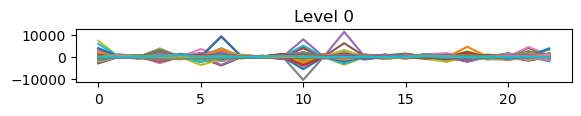

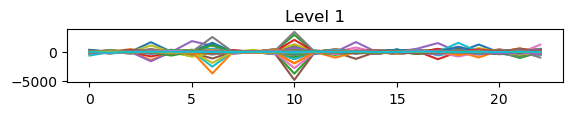

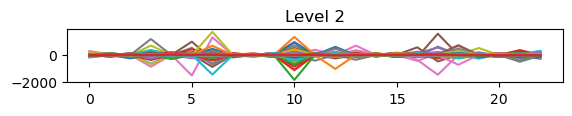

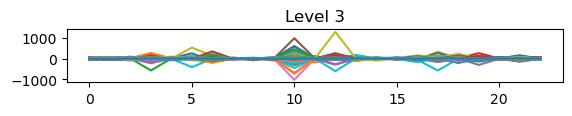

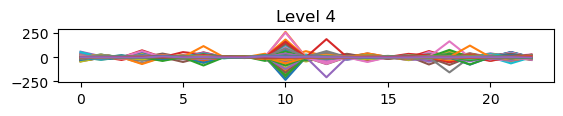

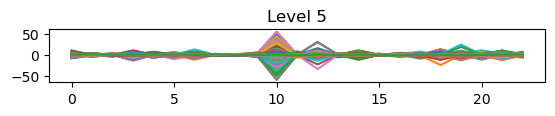

mean_spectrum: [8.01568195e+04 6.40442223e+03 8.26521826e+02 1.13350662e+02
 1.13309066e+01 4.40061450e-01]
var_spectrum: [8.35356111e+09 8.21775853e+07 7.32322391e+05 1.86312821e+04
 1.88579326e+02 8.18012335e-01]


In [78]:
import pywt
import numpy as np

# Load the raw EEG data (assuming it is in the form of a 1D numpy array)
eeg_data=raw.get_data()

# Define the wavelet and decomposition level
wavelet = 'db4'
decomp_level = 5

# Perform the wavelet decomposition
coeffs = pywt.wavedec(eeg_data, wavelet, level=decomp_level)

# Plot the wavelet coefficients for each level (optional)
import matplotlib.pyplot as plt
plt.figure()
for i in range(decomp_level + 1):
    plt.subplot(decomp_level + 1, 1, i + 1)
    plt.plot(coeffs[i])
    plt.title('Level %d' % i)
    plt.show()
# Perform wavelet reconstruction (optional)
reconstructed_signal = pywt.waverec(coeffs, wavelet)

# Extract features from wavelet coefficients
# For example, you could calculate the power spectrum of each level
power_spectrum = []
for c in coeffs:
    power = np.abs(c)**2
    mean_power = np.mean(power, axis=1)
    power_spectrum.append(mean_power)
power_spectrum = np.array(power_spectrum)


#power_spectrum = np.array([np.abs(c)**2 for c in coeffs])

# Perform statistical analysis on the features (optional)
# For example, you could calculate the mean and variance of each level's power spectrum
mean_spectrum = np.mean(power_spectrum, axis=1)
var_spectrum = np.var(power_spectrum, axis=1)

#print("power_spectrum:",power_spectrum)
print("mean_spectrum:",mean_spectrum)
print("var_spectrum:",var_spectrum)